$\newcommand{\var}[3]{{{#1}_\text{#2}^\text{#3}}}$
$\newcommand{\pa}{p_\text{A}}$ $\newcommand{\pb}{p_\text{B}}$
$\newcommand{\wa}{ω_\text{A}}$ $\newcommand{\wb}{ω_\text{B}}$
$\newcommand{\kab}{k_\text{AB}}$ $\newcommand{\kba}{k_\text{BA}}$
$\newcommand{\kex}{k_\text{ex}}$ $\newcommand{\ddt}{\frac{d}{dt}}$

# Chemical exchange in NMR spectroscopy

## The model

In the following description, we examine a protein that undergoes chemical
exchange between two states, **A** and **B**, each with distinct chemical
environments. The exchange process is represented by the equation:

$$ A \underset{\kba}{\stackrel{\kab}{\rightleftharpoons}} B \tag{1} $$

Here, $\kab$ and $\kba$ are the forward and reverse rate constants,
respectively, both of which are first order. The sum of these rate constants,
$\kex = \kab + \kba$, represents the overall exchange rate. The fractional
populations of states **A** and **B** are denoted as $\pa$ and $\pb$,
respectively, with the constraint that $\pa + \pb = 1$. The lifetimes of states
**A** and **B** are defined as $\var{τ}{A}{}=1/\kab$ and $\var{τ}{B}{}=1/\kba$.
The timescale of the exchange process is defined as $\var{τ}{ex}{} = 1 / \kex$.
In the subsequent discussion, our focus is on a specific nucleus within the
protein. For this nucleus, the chemical shift (measured in rad.s<sup>-1</sup>)
is $\wa$ in state **A** and $\wb$ in state **B**, with a difference of
$\var{\Delta ω}{AB}{} = \wb - \wa$.

## The Bloch-McConnell equations

The differential equation system for the first-order two-site exchange reaction,
as given in equation (1), can be easily set up using the chemical reaction rate
law:

$$ \ddt[A] = - \kab[A] + \kba[B] \tag{2} $$

$$ \ddt[B] = - \kba[B] + \kab[A] \tag{3} $$

These equations can be written in matrix form as:

$\newcommand{\vAB}{\begin{pmatrix} [A] \\ [B] \end{pmatrix}}$

$$
\ddt \vAB =
\begin{pmatrix}
    -\kab & +\kba \\
    +\kab & -\kba \\
\end{pmatrix}
\vAB
\tag{4}
$$

At equilibrium, we have:

$$
\ddt[A]=\ddt[B]=0 \implies
\frac{\var{[A]}{eq}{}}{\var{[B]}{eq}{}}=\frac{\kba}{\kab} \tag{5}
$$

which leads to:

$$
\pb=\frac{\var{[B]}{eq}{}}{\var{[A]}{eq}{}+\var{[B]}{eq}{}}=\frac{\kab}{\kab+\kba}
\tag{6}
$$

The Bloch equations express the evolution of magnetization (here, in the
rotating frame) with the $\text{B}_0$ field pointing in the z-direction. They
can be represented in matrix form as:

$\newcommand{\vMxyz}{\begin{pmatrix} M_\text{x} \\ M_\text{y} \\ M_\text{z} \end{pmatrix}}$

$$
\ddt \vMxyz =
\begin{pmatrix}
    -R_2 & -Ω & ω_1\sin\phi \\
    Ω & - R_2 & - ω_1\cos\phi \\
    -ω_1\sin\phi & ω_1\cos\phi & -R_1 \\
\end{pmatrix} \vMxyz +
\begin{pmatrix} 0 \\ 0 \\ R_1 \var{M}{eq}{} \end{pmatrix}
\tag{7}
$$

Here, $R_1$ and $R_2$ represent the rates at which the longitudinal and
transverse magnetization return to equilibrium (in s<sup>-1</sup>), $Ω$ is the
offset resonance frequency (in rad.s<sup>-1</sup>), $ω_1$ and $\phi$ are the
strength (in rad.s<sup>-1</sup>) and phase of the applied RF field,
respectively. $M_{i}$ denotes the magnetization component along the
$i \in \{x,y,z\}$ axis, and $\var{M}{eq}{}$ refers to the equilibrium
magnetization.

To express the Bloch equations in a homogeneous form, we can augment the
magnetization component vector with the identity operator $E$:

$\newcommand{\vEMxyz}{\begin{pmatrix} E \\ M_\text{x} \\ M_\text{y} \\ M_\text{z} \end{pmatrix}}$

$$
\ddt
\vEMxyz =
\begin{pmatrix}
    0 & 0 & 0 & 0 \\
    0 & -R_2 & -Ω & ω_1\sin\phi \\
    0 & Ω & -R_2 & -ω_1\cos\phi \\
    R_1\var{M}{eq}{} & -ω_1\sin\phi & ω_1\cos\phi & -R_1 \\
\end{pmatrix}
\vEMxyz \tag{8}
$$

In a seminal article published in 1958, McConnell observed the analogy between
magnetization and concentration and demonstrated that the Bloch equations can be
extended to incorporate the effects of chemical exchange. The resulting
generalized equation can be expressed in matrix form as follows:

$\newcommand{\vEMxyzAB}{\begin{pmatrix} E \\ M_\text{x}^\text{A} \\ M_\text{y}^\text{A} \\ M_\text{z}^\text{A} \\ M_\text{x}^\text{B} \\ M_\text{y}^\text{B} \\ M_\text{z}^\text{B} \end{pmatrix}}$

$$
\ddt \vEMxyzAB =
\begin{pmatrix}
    0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & - \var{R}{2}{A} - \kab & - \var{Ω}{}{A} & ω_1\sin\phi & \kba & 0 & 0 \\
    0 & \var{Ω}{}{A} & - \var{R}{2}{A} - \kab & - ω_1\cos\phi & 0 & \kba & 0 \\
    \var{R}{1}{A}\var{M}{eq}{A} & - ω_1\sin\phi & ω_1\cos\phi & - \var{R}{1}{A} - \kab & 0 & 0 & \kba \\
    0 & \kab & 0 & 0 & - \var{R}{2}{B} - \kba & - \var{Ω}{}{B} & ω_1\sin\phi \\
    0 & 0 & \kab & 0 & - \var{Ω}{}{B} & - \var{R}{2}{B} - \kba & - ω_1\cos\phi \\
    \var{R}{1}{B}\var{M}{eq}{B} & 0 & 0 & \kab & - ω_1\sin\phi & ω_1\cos\phi & - \var{R}{1}{B} - \kba \\
\end{pmatrix}
\vEMxyzAB \tag{9}
$$

In Equation (9), state-specific parameters are denoted by the superscript
$i \in \{ A, B \}$. It should be noted that Equation (9) corresponds to the
scenario of a single isolated spin-½ undergoing exchange between two chemical
states. However, the same derivation can be applied to more complex spin systems
and/or kinetic models.

The solution to the homogeneous first-order differential equation:

$$ \ddt\mathbf{M}(t)=\mathbf{L}⋅\mathbf{M}(t) \tag{10} $$

is given by:

$$
\mathbf{M}(t+\Delta t)=\exp{\left(\mathbf{L}\Delta t \right)}⋅\mathbf{M}(t)
\tag{11}
$$

where $\mathbf{L}$ and $\mathbf{M}$ correspond to the matrix and vector,
respectively, in equations (5), (8), and (9).

Consequently, to simulate the magnetization trajectory during an NMR experiment
in the presence of chemical exchange, the propagator
$\exp{\left( \mathbf{L} \Delta t \right)}$ needs to be computed for each
individual part of the experiment and multiplied successively with the initial
magnetization vector

In order to simulate the spectra obtained after a 90° pulse, we only need to
consider the transverse magnetization component
$M^+ = M_\text{x} + iM_\text{y}$. The Bloch-McConnell equations in the
laboratory frame can then be simplified as:

$\newcommand{\vMABp}{\begin{pmatrix} M_\text{A}^+ \\ M_\text{B}^+ \end{pmatrix}}$

$$
\ddt\vMABp =
\begin{pmatrix}
    - \var{R}{2}{A} + i\wa - \kab & \kba \\
    \kab & - \var{R}{2}{B} + i\wb - \kba \\
\end{pmatrix}
\vMABp \tag{12}
$$

The solution to the equation is given by:

$$
\begin{pmatrix} M_\text{A}^+(t) \\ M_\text{B}^+(t) \end{pmatrix} =
\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}
\begin{pmatrix} M_\text{A}^+(0) \\ M_\text{B}^+(0) \end{pmatrix}
\tag{13}
$$

where the matrix elements are given by:

$$
a_{11}(t) = \frac{1}{2}
\left[
    \left( 1 - \frac
        {i\Delta ω - \Delta R_2 + \kex \left( \pb - \pa \right)}
        {λ_+ - λ_-}
    \right)
    e^{- λ_-t} +
    \left( 1 + \frac
        {i\Delta ω - \Delta R_2 + \kex \left( \pb - \pa \right)}
        {λ_+ - λ_-}
    \right)
    e^{- λ_+t}
\right] \tag{14}
$$

$$
a_{22}(t) = \frac{1}{2}
\left[
    \left( 1 + \frac
        {i\Delta ω - \Delta R_2 + \kex\left( \pb - \pa \right)}
        {λ_+ - λ_-}
    \right)
    e^{- λ_-t} +
    \left( 1 - \frac
        {i\Delta ω - \Delta R_2 + \kex\left( \pb - \pa \right)}
        {λ_+ - λ_-}
    \right)
    e^{- λ_+t}
\right] \tag{15}
$$

$$
a_{12}(t) = \frac
    {\kex\pa}
    {λ_+ - λ_-}
\left[ e^{- λ_-t} - e^{- λ_+t} \right] \tag{16}
$$

$$
a_{21}(t) = \frac
    {\kex\pb}
    {λ_+ - λ_-}
\left[ e^{- λ_-t} - e^{- λ_+t} \right] \tag{17}
$$

where ${\Delta R}_2 = \var{R}{2}{B} - \var{R}{2}{A}$ and the eigenvalues of the
Bloch-McConnell equations are given by:

$$
λ_± = \frac{1}{2} \left[
    - i \left(
        \wa + \wb
    \right) + \var{R}{2}{A} + \var{R}{2}{B} + \kex ±
    \left\{
        \left(
            i\Delta ω - \Delta R_2 + \kex \left( \pb - \pa \right)
        \right)^2 +
        4 \var{k}{ex}{2} \pa \pb
    \right\}^{\frac{1}{2}} \right] \tag{18}
$$

## Exchange regimes

Figure 1 shows a series of spectra calculated using the Bloch-McConnell
equations (14) as a function of $\kex$. The left panel illustrates the scenario
where the populations of the two states are equal ($\pa$ = $\pb$ = 0.5). We
notice that when the exchange is slow ($\kex ≪ \var{\Delta ω}{AB}{}$), two peaks
are present. These peaks broaden as the exchange rate increases and eventually
merge into a single, very broad peak when $\kex \approx \var{\Delta ω}{AB}{}$
(referred to as coalescence). Conversely, when the exchange is fast
($\kex ≫ \var{\Delta ω}{AB}{}$), we observe a narrow peak at the average
position.

The more intriguing situation arises when the populations are highly skewed,
with $\pa ≫ \pb$ (right panel of Figure 1). In the case of slow exchange, two
peaks are present at positions $ω_{A}$ and $ω_{B}$, with their volumes
proportional to the populations. As the exchange rate increases, the peak
corresponding to the minor state (**B**) experiences significant line
broadening, rapidly becoming invisible. The peak corresponding to the major
state, on the other hand, remains visible. It also broadens as it approaches the
coalescence limit, albeit to a lesser extent than resonance **B**. As the
exchange becomes faster, the peak narrows and ultimately ends up at the position
corresponding to the weighted average of the two states.

<img src="Images/chemical_exchange.png" width="60%">

**Figure 1** Spectra of <sup>15</sup>N nucleus undergoing chemical exchange in a
800 MHz magnet, simulated using the Bloch-McConnell equations.
$\var{\Delta\delta}{AB}{}$ = 3 ppm and $\pb$ = 0.5 on the left and $\pb$ = 0.05
on the right.

Note that the exchange regime is determined by the ratio of the exchange rate
($\kex$) to the chemical shift difference between the two states
($\var{\Delta ω}{AB}{}$), $\kex / \var{\Delta ω}{AB}{}$. Thus, one can push the
system toward slower (faster) exchange regime either by decreasing (increasing)
$\kex$, which can be achieved by changing the experimental conditions such as
the temperature, the pH or the ionic strength of the buffer, etc. or by
increasing (decreasing) $\var{\Delta ω}{AB}{}$, which is easily done by running
the experiment at higher (lower) static magnetic field, $\text{B}_0$.

These observations can be further quantitatively described by examining the
approximated solutions of the Bloch-McConnell equations for the two limiting
cases.

### Slow exchange

When exchange is slow,
$\kex ≪ \left| i\var{\Delta ω}{AB}{} + {\mathrm{\Delta}R}_2 \right|$, equation
(14) simplifies to:

$$
M^+(t) = M*\text{A}^+(0)e^{\left( i\wa - \var{R}{2}{A} - \kab \right)t} +
M*\text{B}^+(0)e^{\left( i\wb - \var{R}{2}{B} - \kba \right)t} \tag{19}
$$

As expected, we obtain two resonances at positions corresponding to **A** and
**B**. However, the exchange process adds a contribution to the effective
relaxation rates of the two peaks, leading to larger linewidths,
$R_{\text{2,eff}}^\text{A} = \var{R}{2}{A} + \kab$ and
${R_{\text{2,eff}}^\text{B} = R}_{2}^\text{B} + \kba$ for **A** and **B**,
respectively. In case where $\pa ≫ \pb$, that is $\kba ≫ \kab$, exchange
contribution to the linewidth of peak **B** gets much larger than peak **A**.
For example, assuming $\kex$ = 1000 s<sup>-1</sup> and $\pb$ = 2%, we have
$\kab$ = 20 s<sup>-1</sup> and $\kba$ = 980 s<sup>-1</sup>, so that peak **B**
is too broad to be detected in the NMR spectra.

### Fast exchange

In case of fast exchange,
$\kex ≫ \left| i\var{\Delta ω}{AB}{} + {\mathrm{\Delta}R}_2 \right|$, equation
(14) approximates to:

$$
M^+(t) = M^+(0)e^{\left( i\overline{ω} - \overline{R_2} -
\frac{\pa\pb\var{\Delta ω}{AB}{}^{2}}{\kex} \right)t} \tag{20}
$$

where $\overline{R_2} = \pa\var{R}{2}{A} + \pb\var{R}{2}{B}$ and
$\overline{ω} = \pa\wa + \pbω_{B}$ are the population-average transverse
relaxation rate and chemical shift, respectively. Here, only a single line at
the weighted-average position is observed with a linewidth corresponding to the
average relaxation rate, plus a contribution due to the exchange process.
Interestingly, while the exchange-induced relaxation rate increase is
independent of the $\text{B}_0$ field in the slow exchange regime, it varies
quadratically with $ω_\text{AB}$, therefore as $\text{B}_0^{2}$, in the fast
exchange regime.

## 1. Simulation of a two states exchange

Run the following two cells to see the effect of the different parameters on the
NMR line shapes.


Output()

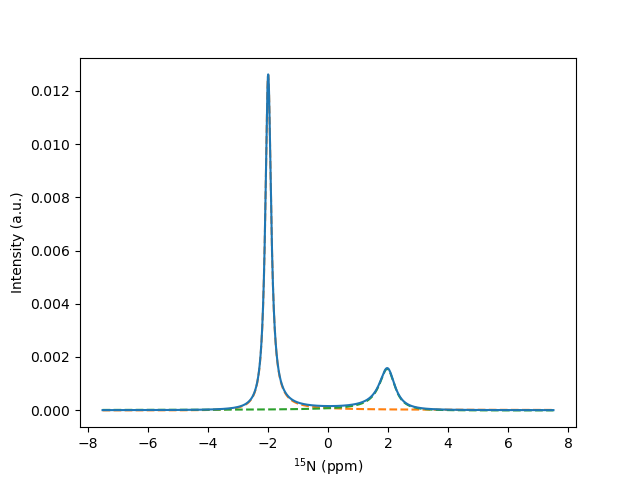

In [18]:
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt

from simulator import calculate_spectrum, Parameters

spectral_width1 = 15.0

fig, ax = plt.subplots()


def update_values(b0, kex, pb, δa, δb, r2a, r2b, yscale):
    params = Parameters(b0, pb, kex, δa, δb, r2a, r2b)
    coordinates = calculate_spectrum(spectral_width1, params)

    ylim = ax.get_ylim()
    ax.cla()
    ax.plot(coordinates.x, coordinates.y1, "--", color="C1")
    ax.plot(coordinates.x, coordinates.y2, "--", color="C2")
    ax.plot(coordinates.x, coordinates.y, color="C0")
    if not yscale:
        ax.set_ylim(*ylim)
    ax.set_xlabel("$^{15}$N (ppm)")
    ax.set_ylabel("Intensity (a.u.)")
    fig.canvas.draw()


# create control elements
yscale_slider = widgets.Checkbox(value=True, description="Rescale")
b0_slider = widgets.FloatSlider(
    value=18.7, min=0.0, max=30.0, step=0.1, description="B0 [T]"
)
kex_slider = widgets.FloatLogSlider(
    value=200, min=0, max=6, step=0.01, description="kex [/s]"
)
pb_slider = widgets.FloatSlider(
    value=0.25, min=0.0, max=1.0, step=0.0001, description="pb"
)
δa_slider = widgets.FloatSlider(
    value=-2.0, min=-7.5, max=7.5, step=0.1, description="δa [ppm]"
)
δb_slider = widgets.FloatSlider(
    value=2.0, min=-7.5, max=7.5, step=0.1, description="δb [ppm]"
)
r2a_slider = widgets.FloatSlider(
    value=10.0, min=0.0, max=100.0, step=0.1, description="R2a [/s]"
)
r2b_slider = widgets.FloatSlider(
    value=10.0, min=0.0, max=100.0, step=0.1, description="R2b [/s]"
)

kd_kon_ui = widgets.HBox([pb_slider, kex_slider])
delta_ui = widgets.HBox([δa_slider, δb_slider])
r2_ui = widgets.HBox([r2a_slider, r2b_slider])
b0_l0_ui = widgets.HBox([b0_slider, yscale_slider])

ui = widgets.VBox([kd_kon_ui, delta_ui, r2_ui, b0_l0_ui])

out = widgets.interactive_output(
    update_values,
    {
        "yscale": yscale_slider,
        "b0": b0_slider,
        "kex": kex_slider,
        "pb": pb_slider,
        "δa": δa_slider,
        "δb": δb_slider,
        "r2a": r2a_slider,
        "r2b": r2b_slider,
    },
)

display(out, ui)

## Questions

### Case 1: exchange between equally populated states

    - Set the following parameters:
    + B0 = 10 Tesla, δa = -2 ppm, δb = 2 ppm, R2a = R2b = 10 s-1, pb = 0.5

- At which $\kex$ value do we observe the coalescence (transition between slow
  and fast exchange) ?
- Compare this value to the frequency difference between states a and b (the
  gyromagnetic ratio of the nitrogen is -27.1 rad.s<sup>-1</sup>.T<sup>-1</sup>)
- Move $\text{B}_0$ to 20 Tesla without changing $\kex$ : describe the new
  exchange regime (slow or fast)
- At which $\kex$ value do we observe the coalescence (transition between slow
  and fast exchange) ?

### Case 2: exchange between a major and a minor states

    - set the following parameters:
    + B0 = 10 Tesla, da = -2 ppm, db = 2 ppm, R2a = R2b = 10 s-1, pb = 0.15

#### Set the $\kex$ to 300 s<sup>-1</sup>

- Compare the line widths of the two resonances. What is the possible
  consequence on the interpretation of the exchange regime ?
- Observe how the line-widths are changing when $\text{B}_0$ is moved from 10T
  to 20T

#### Set the $\kex$ value to 3000 s<sup>-1</sup>

- Observe how line-widths are changing when $\text{B}_0$ is moved from 10T to
  20T
- Compare to the previous situation and suggest an way to distinguish between
  slow and fast exchange regimes in the case of highly skewed populations


$\newcommand{\kon}{k_\text{on}}$ $\newcommand{\koff}{k_\text{off}}$
$\newcommand{\nuf}{\nu_\text{free}}$ $\newcommand{\nub}{\nu_\text{bound}}$
$\newcommand{\num}{\nu_\text{measure}}$ $\newcommand{\Kd}{K_\text{d}}$

# 2. Kinetic of an binding equilibrium E + L $\rightleftharpoons$ EL

Describing the effect of a ligand binding on the observed target molecule's line
shapes constitutes a specific case of a two states equilibrium. The target
molecule is either in the free or bound state and the relative populations of
these states is defined by the dissociation equilibrium constant $\Kd$ and the
concentrations of the ligand $L_0$ and target molecule $E_0$ by the mass action
law:

$$ \Kd = \frac{\koff}{\kon} = \frac{[E][L]}{[EL]} \tag{21} $$

$[E]$ and $[L]$ are the concentrations of the free states of the observed target
and ligand, respectively.

If we write $\pb$ the bound fraction of E ($\pb=[EL]/E_0$), $\pb$ is one of the
roots of equation:

$$
\pb^2-\pb\left(1+\frac{L_0}{E_0}+\frac{\Kd}{E_0}\right)+\frac{L_0}{E_0}=0
\tag{22}
$$

The $\kex$ will be defined by the number of molecules of E that will form a
complex per time unit and the number of complexes that will dissociate at the
same time:

$$ \kex = \kon[L] + \koff = \kon\left([L] + \Kd\right) \tag{23} $$

Equation (23) shows that the line shapes will depend on the total concentration
of ligand as well as on the dissociation equilibrium constants. Therefore, three
cases are usually observed:

### Slow exchange

This situation occurs when the $\Kd$ dissociation constant is very small
compared to the concentration of target $E_0$ (strong binding). The formation of
the complex is limited by a very slow dissociation rate, namely $\kon.\Kd$.
During acquisition, molecules are "frozen" in either their bound or free states
and the two corresponding lines are visible.

### Fast exchange

When the $\Kd$ dissociation constant is larger than the concentration of the
observed molecule (weak binding), the dissociation rate becomes very fast
compared to the frequency difference between the free ($\nuf$) and bound states
($\nub$) leading to a single resonance whose frequency is at the weighted
average of these frequencies. Thus the measurement of the frequency ($\num$) as
a function of the total ligand concentration $L_0$ provides an accurate and
precise measurement of the bound fraction $\pb$:

$$ \pb(L_0) = \frac{\num - \nuf}{\nub - \nuf} \tag{24} $$

Fitting the experimental values of $\pb$ as a function of $L_0$ to the equation
(22) provides a way to determine the dissociation equilibrium constant. Note,
while $\nuf$ is easy to determine, $\nub$ may be very difficult since 100% of
complex may not be reachable given the weak binding. Therefore, the non-linear
fitting procedure often uses both $\Kd$ and $\nub$ as adjustable parameters.

### Intermediate exchange

In this situation, the on and off exchange rates do match the frequency
difference between the bound and free states of the observed molecule. This
leads to the sad situation where resonances vanish upon addition of the ligand.
In this case, one can try to escape this regime by:

- changing temperature (if possible)
- changing the observed nuclei to get another $\Delta ω$ parameter and
  subsequently define another time window.

## Perform simulation


GridspecLayout(children=(Label(value='B0 [T]', layout=Layout(grid_area='widget001')), FloatSlider(value=18.7, …

Output()

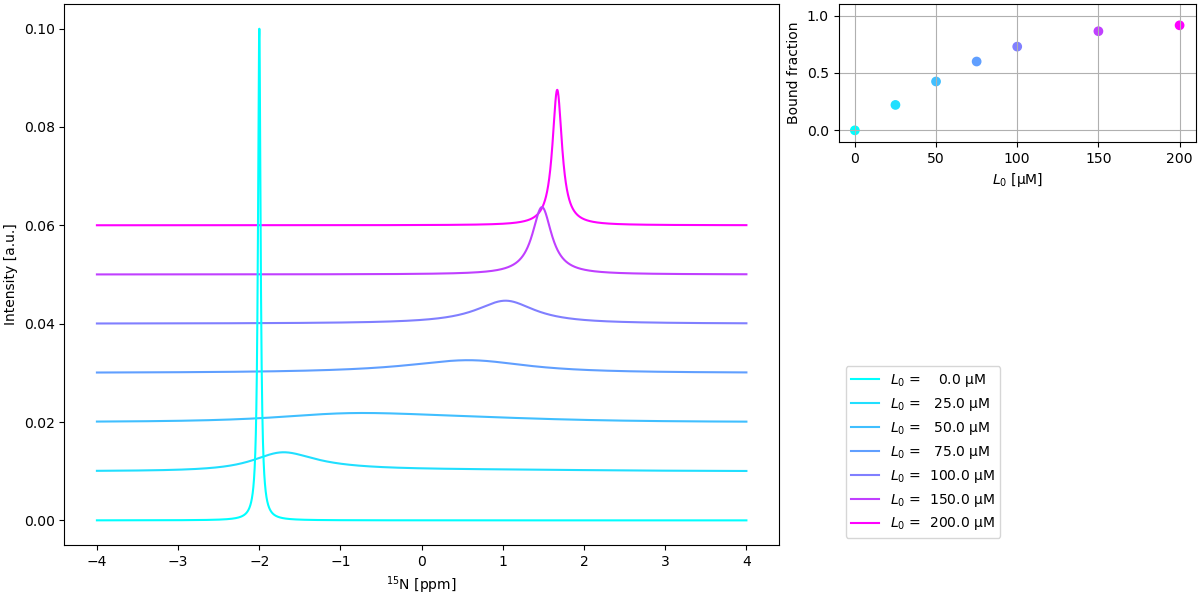

In [21]:
import numpy as np
import matplotlib as mpl


def calculate_el(kd, e_tot, l_tot):
    """Computes the bound fraction"""
    sum_ = e_tot + l_tot + kd
    return 0.5 * (sum_ - np.sqrt(sum_**2 - 4 * e_tot * l_tot))


# Concentration in μM
unit = 1e-6

# Fixed parameters of the titration
e_tot = 100.0 * unit  # Concentration of protein (observed by NMR)

# Compute an array of Ligand/Target ratios
ratios = np.array([0.0, 0.25, 0.5, 0.75, 1.0, 1.5, 2]) / 2.0

# NMR parameters
spectral_width2 = 8.0  # [ppm]

# set up plot
cmap = mpl.cm.cool

fig, axd = plt.subplot_mosaic(
    [
        ["spectra", "spectra", "fraction"],
        ["spectra", "spectra", "legend"],
        ["spectra", "spectra", "legend"],
    ],
    layout="constrained",
    figsize=(12, 6),
)

axd["legend"].axis("off")


def update_values(b0, lmax_um, kd_um, kon, δfree, δbound, r2free, r2bound):
    kd = kd_um * unit

    # Remove old line from plot and plot new one
    axd["spectra"].cla()
    axd["fraction"].cla()

    pb_list = []

    for index, ratio in enumerate(ratios):
        l_tot_um = ratio * lmax_um
        l_tot = l_tot_um * unit

        e_bound = calculate_el(kd, e_tot, l_tot)

        koff = kd * kon
        l_free = l_tot - e_bound
        kex = kon * l_free + koff
        pb = e_bound / e_tot

        params = Parameters(b0, pb, kex, δfree, δbound, r2free, r2bound)
        coordinates = calculate_spectrum(spectral_width2, params)

        axd["spectra"].plot(
            coordinates.x,
            coordinates.y + 0.01 * index,
            label=f"$L_{0}$ = {l_tot_um:6.1f} μM",
            color=cmap(ratio),
            zorder=100000 - index * 10,
        )
        pb_list.append(pb)

    axd["spectra"].set_xlabel("$^{15}$N [ppm]")
    axd["spectra"].set_ylabel("Intensity [a.u.]")

    axd["fraction"].scatter(ratios * lmax_um, pb_list, c=ratios, cmap=cmap)
    axd["fraction"].set_xlabel("$L_{0}$ [μM]")
    axd["fraction"].set_ylabel("Bound fraction")
    axd["fraction"].set_ylim(-0.1, 1.1)
    axd["fraction"].grid(True)

    axd["legend"].legend(*axd["spectra"].get_legend_handles_labels(), loc="lower left")

    fig.canvas.draw()


# create control elements
b0_slider = widgets.FloatSlider(value=18.7, min=0.0, max=30.0, step=0.1)
lmax_slider = widgets.FloatLogSlider(value=2e2, min=0, max=3, step=0.01)
kd_slider = widgets.FloatLogSlider(value=1e1, min=-3, max=3, step=0.01)
kon_slider = widgets.FloatLogSlider(value=1e8, min=6, max=8, step=0.01)
δfree_slider = widgets.FloatSlider(value=-2.0, min=-7.5, max=7.5, step=0.1)
δbound_slider = widgets.FloatSlider(value=2.0, min=-7.5, max=7.5, step=0.1)
r2free_slider = widgets.FloatSlider(value=10.0, min=0.0, max=100.0, step=0.1)
r2bound_slider = widgets.FloatSlider(value=10.0, min=0.0, max=100.0, step=0.1)


grid = widgets.GridspecLayout(4, 4)
grid[0, 0] = widgets.Label("B0 [T]")
grid[0, 1] = b0_slider
grid[0, 2] = widgets.Label("Lmax [μM]")
grid[0, 3] = lmax_slider
grid[1, 0] = widgets.Label("Kd [μM]")
grid[1, 1] = kd_slider
grid[1, 2] = widgets.Label("kon [/s]")
grid[1, 3] = kon_slider
grid[2, 0] = widgets.Label("δ(free) [ppm]")
grid[2, 1] = δfree_slider
grid[2, 2] = widgets.Label("δ(bound) [ppm]")
grid[2, 3] = δbound_slider
grid[3, 0] = widgets.Label("R2(free) [/s]")
grid[3, 1] = r2free_slider
grid[3, 2] = widgets.Label("R2(bound) [/s]")
grid[3, 3] = r2bound_slider

out = widgets.interactive_output(
    update_values,
    {
        "b0": b0_slider,
        "lmax_um": lmax_slider,
        "kd_um": kd_slider,
        "kon": kon_slider,
        "δfree": δfree_slider,
        "δbound": δbound_slider,
        "r2free": r2free_slider,
        "r2bound": r2bound_slider,
    },
)

display(grid, out)

## Questions

- Given the following study conditions, define the values of Kd for which the
  exchange equilibrium is is fast exchange for all titration points

      + B0 = 10 Tesla, R2a = R2b = 10 s-1, E0 = 100 µM

- Comment about the initial value of delta omega (4 ppm). Is that realistic ?
  What are the range of chemical shift perturbations usually observed ? Is there
  a difference between proton and nitrogen chemical shifts ?
